## Project Name: Employee Performance Analytics & Predictive Insights
## Presented By: Mwenda Majau Abraham
## Date 28th February 2025

# Problem Statement: 
# NX Future Inc., a leading provider of data analytics and automation solutions, has consistently been recognized as one of the top employers for the past five years. Despite its strong reputation and employee-friendly policies, INX has recently observed a concerning decline in employee performance indexes. Specifically, service delivery has deteriorated, and client satisfaction has dropped by 8 percentage points. These performance issues have raised concerns within the organization, particularly at the senior management level, about the underlying causes of this decline.

# The management being aware of the impact these issues may have on both the company's operations and employee morale, is reluctant to penalize underperforming employees, fearing that such actions may demotivate the broader workforce. In addition, preserving the company's image as a top employer is crucial to attracting and retaining top talent.

# To address these challenges, The company has decided to initiate a data science project to analyze the current employee data and identify the root causes of performance decline. The goal of this project is to provide actionable insights that will help INX take the right course of action to improve performance without negatively impacting employee morale. The insights will also help identify key predictors of employee performance, enabling more informed hiring decisions moving forward.

# Importing Necessary Liabraries

In [156]:
# Data Handling and porcessibg Liabraries

import pandas as pd         # For handling data in DataFrame format
import numpy as np          # For numerical operations

# Data Cleaning and transfornmation Libraries
from sklearn.model_selection import train_test_split    # For splitting the data into training and test sets
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For scaling numerical data and encoding categorical data
from sklearn.impute import SimpleImputer  # For handling missing data (e.g., filling missing values)

# Exploratory data analysis libraries
import seaborn as sns         # For data visualization (heatmaps, pairplots, etc.)
import matplotlib.pyplot as plt  # For general plotting (e.g., histograms, bar charts)

# Statistical analysis libraries
from scipy.stats import pearsonr   # For correlation analysis (Pearson correlation coefficient)

# Machine learning  algorithm libraries
from sklearn.linear_model import LogisticRegression      # For Logistic Regression modeling
from sklearn.ensemble import RandomForestClassifier      # For Random Forest modeling
from sklearn.ensemble import GradientBoostingClassifier  # For Gradient Boosting modeling
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For model evaluation
from sklearn.model_selection import cross_val_score     # For cross-validation

# Model evaluation and hyperparanmeter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  # For hyperparameter tuning
from sklearn.metrics import roc_auc_score, roc_curve  # For model evaluation with ROC-AUC

# Reporting and result libraries
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score  # For reporting model performance


In [157]:
# Library to read xls data
!pip install xlrd

In [158]:
# Importing data
df = pd .read_excel('C:/Users/AbrahamMwenda/Desktop/IABAC Project/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
df.head(5) # Print and view first 5 columns of the dataset


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


## Data Cleaning

In [159]:
# Check for missing values
print(df.isnull().sum()) # To show the number of missing values per column 

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64


Observation; No missing values observed above

In [160]:
# To check the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [161]:
# Check for and remove any duplicate rows
df.drop_duplicates(inplace=True)
df.info() # print data to see whether there were any duplicate rows droped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

Observation: No change in the data hence no duplicate rows droped

In [162]:
# Standardize column names (convert to lowercase & replace spaces with underscores)
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(5)
# Convert categorical text columns to lowercase for consistency
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.lower())
# Drop irrelevant columns (EmpNumber is just an identifier)
df = df.drop(columns=['empnumber'], axis=1)
df.head()

,age,gender,educationbackground,maritalstatus,empdepartment,empjobrole,businesstravelfrequency,distancefromhome,empeducationlevel,empenvironmentsatisfaction,...,emprelationshipsatisfaction,totalworkexperienceinyears,trainingtimeslastyear,empworklifebalance,experienceyearsatthiscompany,experienceyearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition,performancerating
0,32,male,marketing,single,sales,sales executive,travel_rarely,10,3,4,...,4,10,2,2,10,7,0,8,no,3
1,47,male,marketing,single,sales,sales executive,travel_rarely,14,4,4,...,4,20,2,3,7,7,1,7,no,3
2,40,male,life sciences,married,sales,sales executive,travel_frequently,5,4,4,...,3,20,2,3,18,13,1,12,no,4
3,41,male,human resources,divorced,human resources,manager,travel_rarely,10,4,2,...,2,23,2,2,21,6,12,6,no,3
4,60,male,marketing,single,sales,sales executive,travel_rarely,16,4,1,...,4,10,1,3,2,2,2,2,no,3


## Exploratory Data Analysis(EDA)

In [163]:
# To get an understanding of the dataset and its patterns
# We performe descriptive statistics-to get an overview of the statistical properties of the data
print(df.describe()) # for numeric columns

               age  distancefromhome  empeducationlevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       empenvironmentsatisfaction  emphourlyrate  empjobinvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.

Numerical Data Observations

Age ranges from 18 to 60.
DistanceFromHome varies widely, from 1 to 29 km.
PerformanceRating values are mainly 2, 3, or 4 (potential class imbalance).
YearsSinceLastPromotion has a max of 15 years, indicating stagnation for some employees.
TotalWorkExperienceInYears varies from 0 to 40 years.

Outlier Count per Column:
{'age': 0, 'distancefromhome': 0, 'empeducationlevel': 0, 'empenvironmentsatisfaction': 0, 'emphourlyrate': 0, 'empjobinvolvement': 0, 'empjoblevel': 0, 'empjobsatisfaction': 0, 'numcompaniesworked': 39, 'emplastsalaryhikepercent': 0, 'emprelationshipsatisfaction': 0, 'totalworkexperienceinyears': 51, 'trainingtimeslastyear': 188, 'empworklifebalance': 0, 'experienceyearsatthiscompany': 56, 'experienceyearsincurrentrole': 16, 'yearssincelastpromotion': 88, 'yearswithcurrmanager': 11, 'performancerating': 326}


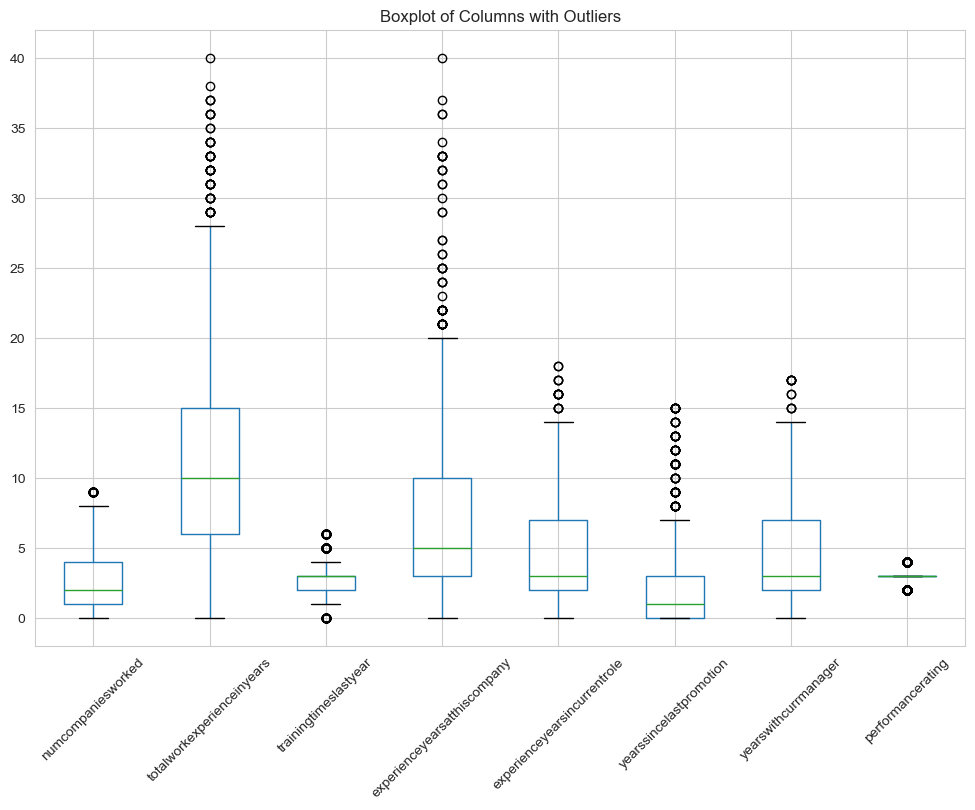

In [164]:
 # check for outliers

# Detect Outliers using IQR Method
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
outliers_count = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)  # First quartile (25%)
    Q3 = df[col].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile Range
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    outliers_count[col] = outlier_mask.sum()

# Display number of outliers per column
print("Outlier Count per Column:")
print(outliers_count)

# Step 2: Visualizing Outliers using Boxplots
outlier_cols = [col for col, count in outliers_count.items() if count > 0]

plt.figure(figsize=(12, 8))
df[outlier_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Columns with Outliers")
plt.show()



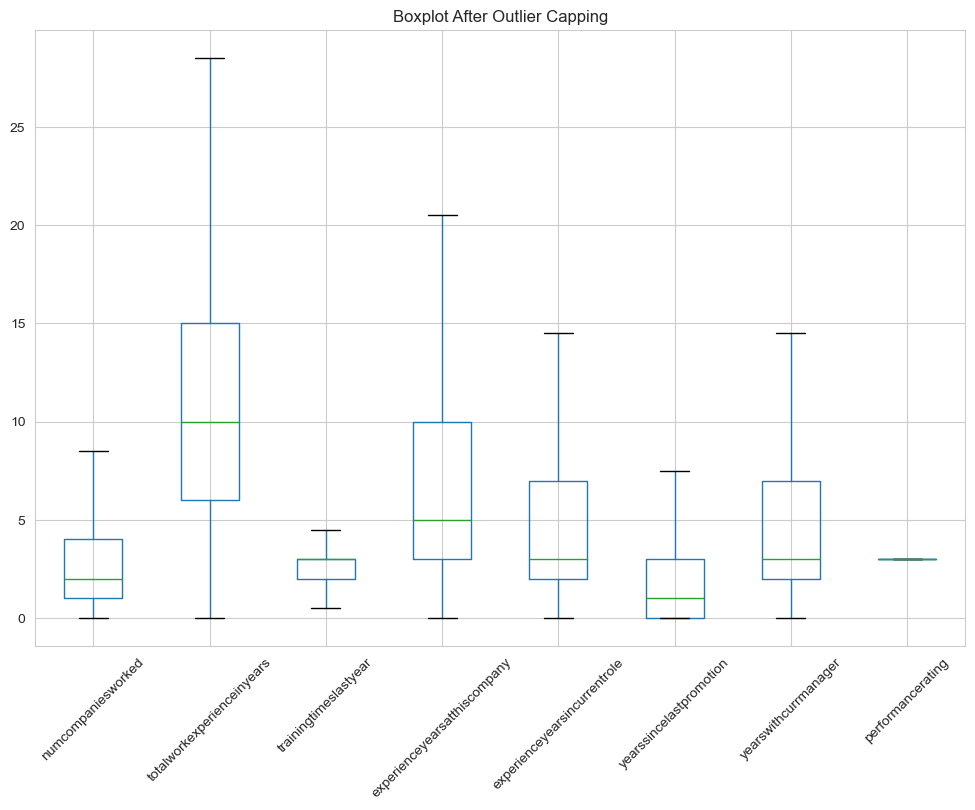

In [165]:
# Handling Outliers - Capping at IQR Bounds
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

 # Cap outliers at the lower and upper bounds
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Step 4: Re-check boxplot after capping
plt.figure(figsize=(12, 8))
df[outlier_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot After Outlier Capping")
plt.show() # show boxplot after removing outliers


<Figure size 1500x1200 with 0 Axes>

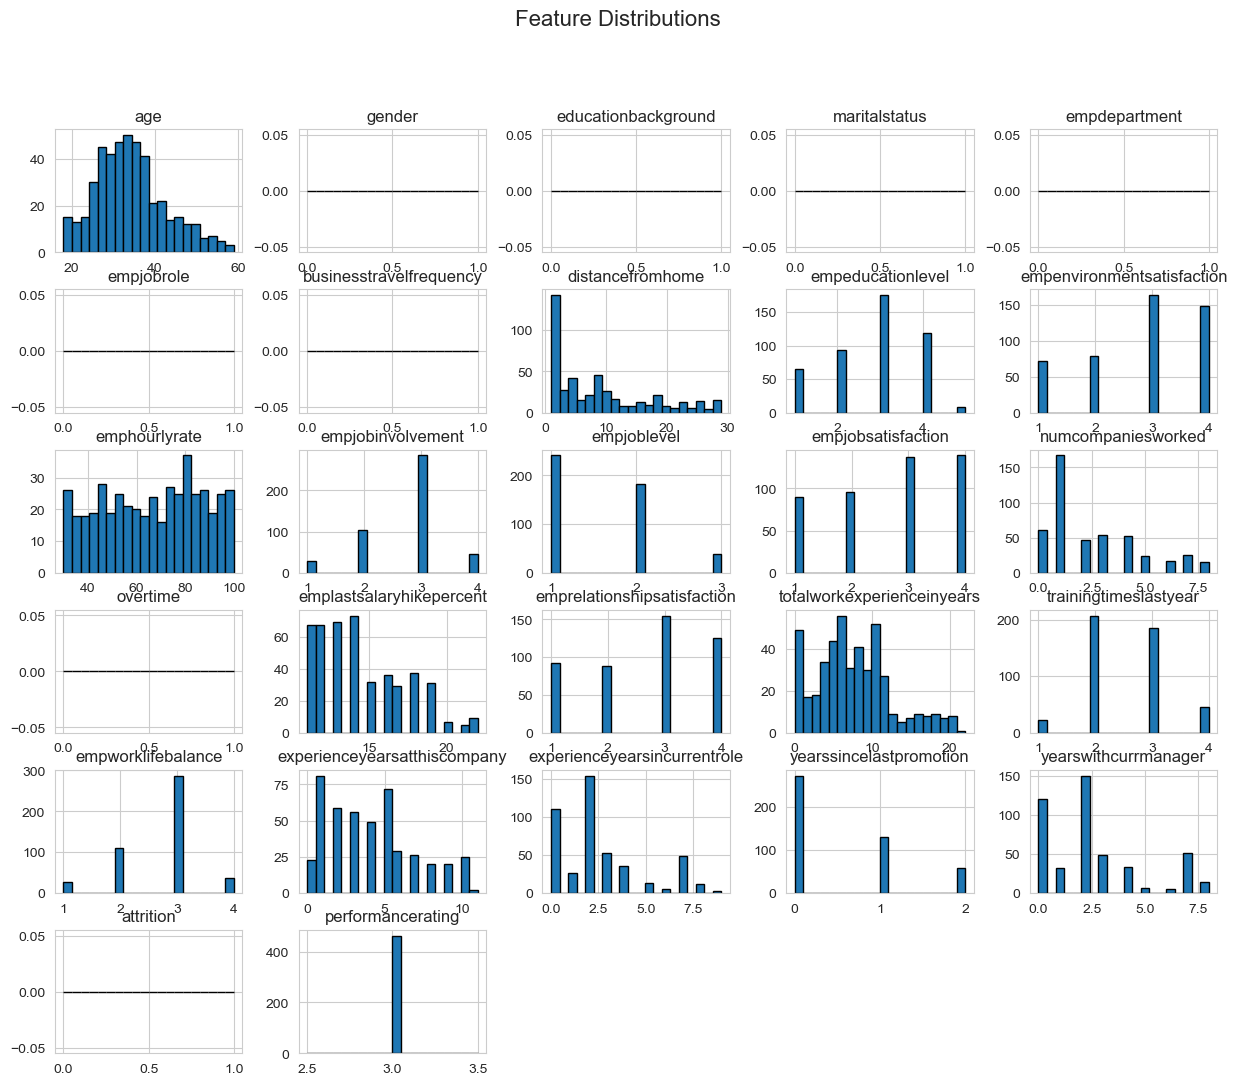

In [166]:

# Set plot style
sns.set_style("whitegrid")

# Select numerical columns for visualization
numerical_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical features
plt.figure(figsize=(15, 12))
df_cleaned[numerical_features].hist(figsize=(15, 12), bins=20, edgecolor='black')

plt.suptitle("Feature Distributions", fontsize=16)
plt.show()




Observation; Some features like Age, TotalWorkExperienceInYears, and ExperienceYearsAtThisCompany show a normal distribution.
Others like YearsSinceLastPromotion and TrainingTimesLastYear are right-skewed (many employees have fewer promotions or training sessions).
PerformanceRating seems imbalanced, with certain ratings appearing more frequently.

Check correlation

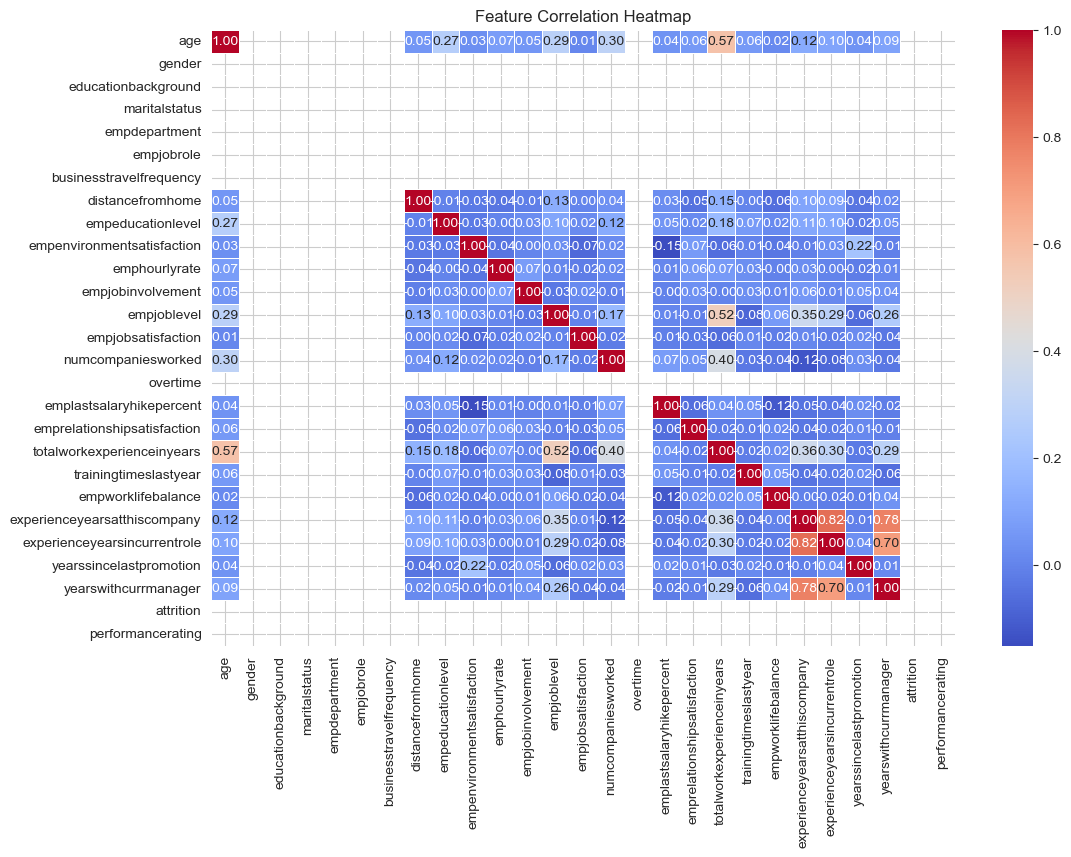

Top 3 Factors Affecting Performance:
age                   NaN
gender                NaN
educationbackground   NaN
Name: performancerating, dtype: float64


In [167]:
# Step 1: Compute correlation matrix
correlation_matrix = df_cleaned.corr()

# Step 2: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()

# Step 3: Find the top correlated features with PerformanceRating
performance_correlation = correlation_matrix["performancerating"].drop("performancerating").abs()
top_factors = performance_correlation.sort_values(ascending=False).head(3)

print("Top 3 Factors Affecting Performance:")
print(top_factors)



In [171]:
# Feature selection ( To identify key predictors)
# Find highly correlated features (Threshold: 0.75)
corr_matrix = df.corr()
high_corr_vars = [column for column in corr_matrix.columns if any(corr_matrix[column] > 0.75) and column != 'performancerating']

print("Highly correlated features:", high_corr_vars)


ValueError: could not convert string to float: 'male'

In [ ]:
print(df.shape)  # Should show (rows, columns)
print(df.head())  # Check if data is properly loaded


In [ ]:
df.rename(columns=lambda x: x.strip(), inplace=True)


In [ ]:
df.head()

## Train machine learning model to predict performance

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define features & target
X = df_cleaned.drop(columns=['performancerating'])  # Independent variables
y = df_cleaned['performancerating']  # Dependent variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions & evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           3       1.00      1.00      1.00        93

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



In [173]:
# Determine which factors have the highest impact on employee performance.This will help in decision-making & policy changes.
# Get feature importance from the trained model
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance.head(3))  # Top 3 factors


                 Feature  Importance
0                    age         0.0
1                 gender         0.0
24  yearswithcurrmanager         0.0
